# Google Play Store Data Analysis

## 1) Importing  Libraries

In [1]:
import opendatasets as od

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import seaborn as sns

In [5]:
import matplotlib.pyplot as plt

In [6]:
!pip install googletrans==3.1.0a0 --quiet

In [7]:
from googletrans import Translator # Google Translator to translate App's name which are not in English

In [8]:
trans = Translator()

In [9]:
dataset_url='https://www.kaggle.com/gauthamp10/google-playstore-apps'

In [10]:
od.download(dataset_url)

Skipping, found downloaded files in ".\google-playstore-apps" (use force=True to force download)


In [11]:
data_file='google-playstore-apps/Google-Playstore.csv'

In [12]:
df=pd.read_csv(data_file) # Reading csv file

In [13]:
df_copy=df.copy() # Making a copy of original dataset

In [14]:
df.info() # Column names with datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

In [15]:
df.shape # Number of Rows and Columns

(2312944, 24)

## 2) Check Missing Data

In [16]:
def missing_data():  
    missing_values=df.isnull().sum()
    missing_percentage=missing_values/len(df)*100
    missing_value_table=pd.concat([missing_values,missing_percentage],keys=['Missing Values', 'Missing Percentage'],axis=1)
    print(missing_value_table)

In [17]:
missing_data() 

                   Missing Values  Missing Percentage
App Name                        2            0.000086
App Id                          0            0.000000
Category                        0            0.000000
Rating                      22883            0.989345
Rating Count                22883            0.989345
Installs                      107            0.004626
Minimum Installs              107            0.004626
Maximum Installs                0            0.000000
Free                            0            0.000000
Price                           0            0.000000
Currency                      135            0.005837
Size                          196            0.008474
Minimum Android              6530            0.282324
Developer Id                   33            0.001427
Developer Website          760835           32.894657
Developer Email                31            0.001340
Released                    71053            3.071972
Last Updated                

#### 'App name'  column has 2 missing values but no missing  values for 'App Id'

In [18]:
df[df['App Name'].isnull()] # Checking the Null data for 'App Name'

App Name           App Id          Category  Rating  Rating Count  \
45686        NaN   se.promedia.NA  News & Magazines     2.4         470.0   
2117918      NaN  com.Tomkii.NULl            Arcade     4.3           6.0   

        Installs  Minimum Installs  Maximum Installs  Free  Price  ...  \
45686    50,000+           50000.0             84097  True    0.0  ...   
2117918      50+              50.0                98  True    0.0  ...   

             Developer Website                  Developer Email      Released  \
45686    https://www.na.se/app  kundservice.bnlo@bonniernews.se   Aug 8, 2011   
2117918                    NaN        tomek.rybinski@interia.pl  Mar 17, 2021   

         Last Updated Content Rating  \
45686    Dec 21, 2020       Everyone   
2117918  Mar 17, 2021       Everyone   

                                            Privacy Policy Ad Supported  \
45686    https://www.na.se/info/mittmedias-personuppgif...         True   
2117918                                                NaN         True   

        In App Purchases Editors Choice         Scraped Time  
45686              False          False  2021-06-15 21:04:54  
2117918            False          False  2021-06-16 10:09:12  

[2 rows x 24 columns]

In [19]:
df.drop(df.index[[45686,2117918]], inplace=True) # Dropping rows which doesn't have 'App Name'

In [20]:
missing_data() # Checking again null data for 'App Name'

                   Missing Values  Missing Percentage
App Name                        0            0.000000
App Id                          0            0.000000
Category                        0            0.000000
Rating                      22883            0.989346
Rating Count                22883            0.989346
Installs                      107            0.004626
Minimum Installs              107            0.004626
Maximum Installs                0            0.000000
Free                            0            0.000000
Price                           0            0.000000
Currency                      135            0.005837
Size                          196            0.008474
Minimum Android              6530            0.282324
Developer Id                   33            0.001427
Developer Website          760834           32.894642
Developer Email                31            0.001340
Released                    71053            3.071975
Last Updated                

In [21]:
df.head()

App Name  \
0                                            Gakondo   
1                                Ampere Battery Info   
2                                             Vibook   
3  Smart City Trichy Public Service Vehicles 17UC...   
4                                            GROW.me   

                       App Id       Category  Rating  Rating Count Installs  \
0         com.ishakwe.gakondo      Adventure     0.0           0.0      10+   
1  com.webserveis.batteryinfo          Tools     4.4          64.0   5,000+   
2        com.doantiepvien.crm   Productivity     0.0           0.0      50+   
3     cst.stJoseph.ug17ucs548  Communication     5.0           5.0      10+   
4        com.horodyski.grower          Tools     0.0           0.0     100+   

   Minimum Installs  Maximum Installs  Free  Price  ...  \
0              10.0                15  True    0.0  ...   
1            5000.0              7662  True    0.0  ...   
2              50.0                58  True    0.0  ...   
3              10.0                19  True    0.0  ...   
4             100.0               478  True    0.0  ...   

                  Developer Website              Developer Email  \
0       https://beniyizibyose.tk/#/       jean21101999@gmail.com   
1   https://webserveis.netlify.app/         webserveis@gmail.com   
2                               NaN          vnacrewit@gmail.com   
3  http://www.climatesmarttech.com/  climatesmarttech2@gmail.com   
4       http://www.horodyski.com.pl    rmilekhorodyski@gmail.com   

       Released  Last Updated Content Rating  \
0  Feb 26, 2020  Feb 26, 2020       Everyone   
1  May 21, 2020  May 06, 2021       Everyone   
2   Aug 9, 2019  Aug 19, 2019       Everyone   
3  Sep 10, 2018  Oct 13, 2018       Everyone   
4  Feb 21, 2020  Nov 12, 2018       Everyone   

                                      Privacy Policy Ad Supported  \
0                 https://beniyizibyose.tk/projects/        False   
1  https://dev4phones.wordpress.com/licencia-de-uso/         True   
2  https://www.vietnamairlines.com/vn/en/terms-an...        False   
3                                                NaN         True   
4                        http://www.horodyski.com.pl        False   

  In App Purchases Editors Choice         Scraped Time  
0            False          False  2021-06-15 20:19:35  
1            False          False  2021-06-15 20:19:35  
2            False          False  2021-06-15 20:19:35  
3            False          False  2021-06-15 20:19:35  
4            False          False  2021-06-15 20:19:35  

[5 rows x 24 columns]

## 3)  Checking Columns for datatypes

### Datatype  of 'Released ' & 'Last Updated' column is  ''Object'

In [22]:
df.Released=pd.to_datetime(df.Released) #change Datatype of 'Released' column to Datetime

In [23]:
df['Last Updated']=pd.to_datetime(df['Last Updated']) #change Datatype of 'Last Updated' column to Datetime

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2312942 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype         
---  ------             -----         
 0   App Name           object        
 1   App Id             object        
 2   Category           object        
 3   Rating             float64       
 4   Rating Count       float64       
 5   Installs           object        
 6   Minimum Installs   float64       
 7   Maximum Installs   int64         
 8   Free               bool          
 9   Price              float64       
 10  Currency           object        
 11  Size               object        
 12  Minimum Android    object        
 13  Developer Id       object        
 14  Developer Website  object        
 15  Developer Email    object        
 16  Released           datetime64[ns]
 17  Last Updated       datetime64[ns]
 18  Content Rating     object        
 19  Privacy Policy     object        
 20  Ad Supported       bool 

In [25]:
df.Released.min() 

Timestamp('2010-01-28 00:00:00')

##### App Data is collected from year January 2010

In [26]:
df.Released.max() 

Timestamp('2021-06-16 00:00:00')

##### App Data is collected till Year June 2021. So, Data is from year 2010 to 2021

## 4) Released Apps yearwise 

C:\Users\vinay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Released', ylabel='count'>

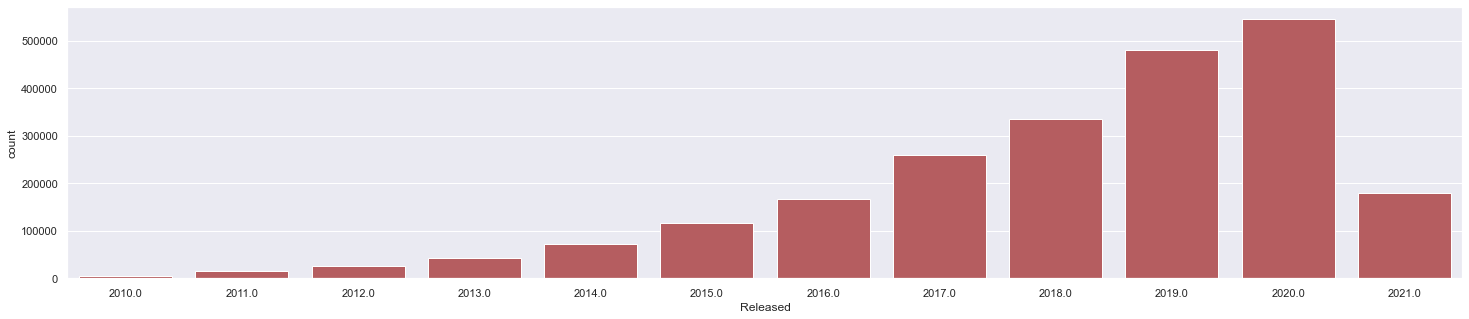

In [27]:
sns.set_theme(context='notebook')
plt.figure(figsize=(25,5))
sns.countplot((df.Released.dt.year),color='r')

##### We can see clearly there is increasing trend in apps released every year. Data for year 2021 is till June Month

## 5) App Updates 

C:\Users\vinay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Last Updated', ylabel='count'>

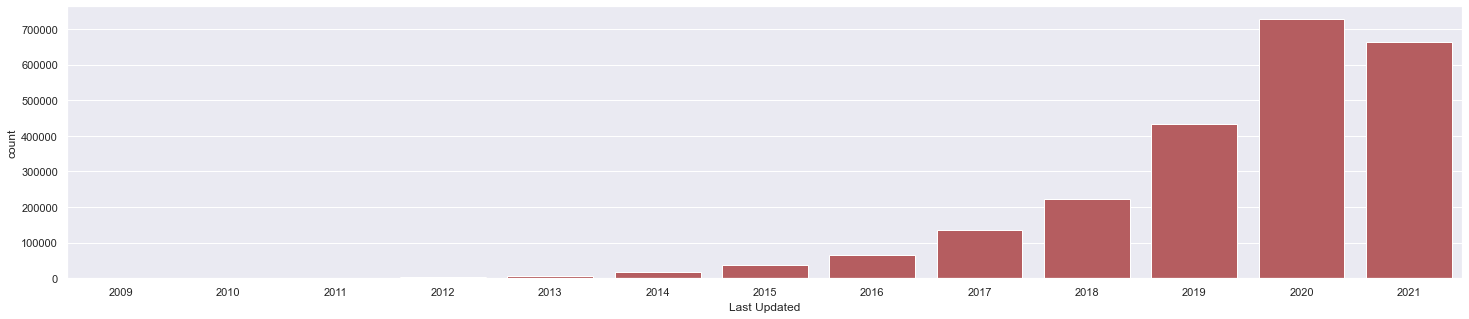

In [28]:
plt.figure(figsize=(25,5))
sns.countplot(df['Last Updated'].dt.year,color='r')

##### App Updates for data is from year 2009  to year 2021. There is negligible number of updates for apps till 2013. After 2013 there is uptrend in number of updates

In [29]:
df.sample(15)

App Name  \
676985   Flying Bus Robot Car - Hammer Robot Transform ...   
1134974  SMART TRICHY CTRD Reg notice_situation_regd_of...   
599973                        Grand Theft Battle Auto 2019   
1558413                                 Lock Screen Broken   
1598756                                      WaterJAM 2017   
1545996                                    Good-bye Stress   
2171235                          छत्तीसगढ़ प्रदेश  साहू संघ   
2279021                                            Taskfit   
1162016                    Instrumen Religi Islami Offline   
952706                        DESIGNnIDEA - Hire Designers   
884019                                       TBingo Mobile   
1160969                         Hotels Barbados by tritogo   
676452                            Family Law Books Offline   
1416883   HD Lake Wallpapers: Christmas and Expo 2020 Gift   
1192856  Mod Craft Pixel Hunter: Zombie Rise (Early Acc...   

                                                    App Id           Category  \
676985                   com.inferno.hammer.robot.bus.game            Weather   
1134974                tech.cst.Smart.societiesofsituation      Communication   
599973                     com.grand.theft.auto.battle2019             Action   
1558413                              com.hlpr.brokenscreen              Tools   
1598756                     com.eventfull.app.waterjam2017             Events   
1545996  appinventor.ai_johnlcm.ComfortAppForSchoolProject   Health & Fitness   
2171235            in.co.clientscape.chhattisgarhsahusangh             Social   
2279021                        com.basewalk.taskfitandroid       Productivity   
1162016  com.anaksantri.instrumenreligiislamioffline.in...      Music & Audio   
952706                         com.designnidea.designnidea           Business   
884019                 com.upgradeengineering.tbingomobile      Entertainment   
1160969                       com.wHotelsBarbadosbytritogo     Travel & Local   
676452                    com.amarcokolatos.LearnFamilyLaw  Books & Reference   
1416883                        com.kwtdev.hdlakewallpapers      Entertainment   
1192856                          com.zonpix.gun.adi.guimod             Action   

         Rating  Rating Count  Installs  Minimum Installs  Maximum Installs  \
676985      4.9         332.0   50,000+           50000.0             70089   
1134974     0.0           0.0        1+               1.0                 1   
599973      3.4        1634.0  500,000+          500000.0            565900   
1558413     0.0           0.0      500+             500.0               626   
1598756     0.0           0.0      100+             100.0               139   
1545996     0.0           0.0       10+              10.0                10   
2171235     4.5          22.0    1,000+            1000.0              2573   
2279021     5.0           7.0      100+             100.0               426   
1162016     4.9           8.0      100+             100.0               368   
952706      0.0           0.0       10+              10.0                19   
884019      4.2          53.0   10,000+           10000.0             22380   
1160969     0.0           0.0       50+              50.0                54   
676452      4.5          17.0    1,000+            1000.0              3956   
1416883     0.0           0.0       10+              10.0                21   
1192856     0.0           0.0       50+              50.0                85   

         Free  Price  ...                         Developer Website  \
676985   True    0.0  ...                                       NaN   
1134974  True    0.0  ...          http://www.climatesmarttech.com/   
599973   True    0.0  ...                                       NaN   
1558413  True    0.0  ...                                       NaN   
1598756  True    0.0  ...               http://www.eventfull-us.com   
1545996  True    0.0  ...                                       NaN  

### Some columns have values in boolean format. Let's change the these values in appropriate format.

## 6)  Changing Column values
###  Replacing T/F values with 'Free' & 'Paid' for 'Free'  column


In [30]:
df['Free']=np.where(df.Free==True,'Free',df.Free)

In [31]:
df['Free']=np.where(df.Free=='False','Paid',df.Free)

In [32]:
df.Free.value_counts()

Free    2267874
Paid      45068
Name: Free, dtype: int64

### Replacing T/F values with 'Ad Support' & 'No Ad Support' for 'Ad Supported' column

In [33]:
df['Ad Supported']=np.where(df['Ad Supported']==True,'Ad Support',df['Ad Supported'])

In [34]:
df['Ad Supported']=np.where(df['Ad Supported']=='False','No Ad Support',df['Ad Supported'])

### Replacing T/F values with 'In-App Purchase' & 'No In-App Purchase' for 'In-App Purchase' column

In [35]:
df['In App Purchases'].value_counts()

False    2117633
True      195309
Name: In App Purchases, dtype: int64

In [36]:
df['In App Purchases']=np.where(df['In App Purchases']==True,'In-App Purchase',df['In App Purchases'])

In [37]:
df['In App Purchases']=np.where(df['In App Purchases']=='False','No In-App Purchase',df['In App Purchases'])

## 7) Let's analyze 'Size' Column

In [38]:
df.Size.sample(20)

1422008    7.0M
450622     4.9M
601973      14M
908636      15M
594724      61M
2095284    1.6M
188585      14M
280885     4.9M
1804963     30M
751643     3.0M
251184      28M
2312699    3.7M
481083     2.3M
772429      35M
442457     7.4M
687180     6.9M
1283208    1.5M
290173     4.7M
1749563     42M
1891910    1.7M
Name: Size, dtype: object

##### 'Size' column has 'object' datatype with different units attached to size of app( M,k,G). Also there are some garbage values like 'Varies with device'

In [39]:
len(df[df.Size=='Varies with device'])  #Total garbage values

74777

In [40]:
df.Size.replace(to_replace='Varies with device',value='',inplace=True) #Replacing garbage values

In [41]:
len(df[df.Size=='Varies with device'])  # After replacing garbage values checking data

0

In [42]:
(df.Size.str.contains('M',regex=True)).value_counts() # Maximum apps having size in 'MB'

True     2201703
False     111043
Name: Size, dtype: int64

In [43]:
(df.Size.str.contains('k')).value_counts() # Maximum apps having size in 'KB'     

False    2276493
True       36253
Name: Size, dtype: int64

In [44]:
(df.Size.str.contains('G')).value_counts()   # Maximum apps having size in 'GB'

False    2312733
True          13
Name: Size, dtype: int64

### Extracting Number and Unit from 'Size' column into 2 different columns 

In [45]:
Size_Unit = df.Size.str.extract('([^a-zA-Z]+)([a-zA-Z]+)', expand=True)
Size_Unit.columns = ['number', 'unit']

In [46]:
Size_Unit.number.replace(to_replace=' ',value='0',inplace=True) 

In [47]:
Size_Unit.number.replace(',','', regex=True, inplace=True)  #Replacing ',' with ''

In [48]:
Size_Unit.number.sample(10) # Sample of 'number' column 

1676912    4.2
1978794     14
1960440     22
1561435    1.8
1760631    1.8
1862642     53
643788     9.6
836432     2.4
2155850     16
503388     NaN
Name: number, dtype: object

In [49]:
df['Size_']=Size_Unit.number # Adding 'number' column to dataset df as 'Size_'

In [50]:
df['Unit']=Size_Unit.unit  # Adding 'unit' column to dataset df as 'Unit'

In [51]:
df.Size_=pd.to_numeric(df.Size_) # Changing datatype of 'Size_' to Numeric 

### Now, some apps having size in GB and KB, we must change it into MB 

In [52]:
unit_sample=list(df.Unit)

In [53]:
size_sample=list(df.Size_)

In [54]:
unit_sample_new=[]

In [55]:
for unit in unit_sample:
    if type(unit)==float:
        unit_sample_new.append('')
    else:
        unit_sample_new.append(unit)
        

In [56]:
df.Size_.fillna(value=0,inplace=True)

In [57]:
size_sample_new=[]

### App size of KB  is divided by 1000 & App size of GB is multiplied by 1000 to convert both in MB

In [58]:
for  num in range(0,len(df)):
    if type(unit_sample[num])!=str:
        size_sample_new.append(size_sample[num])
    elif 'k'in unit_sample[num]:
        size_sample_new.append((size_sample[num])/1000)
       
    elif 'G'in unit_sample[num]:
        size_sample_new.append((size_sample[num])*1000)
        
    elif 'M'in unit_sample[num]:
        size_sample_new.append(size_sample[num])

In [59]:
len(size_sample_new)==len(df) # Same counts in both dataset

True

In [60]:
df['Size_MB']=size_sample_new # Adding 'size_sample_new'list to dataset as 'Size_MB'

In [61]:
df.Size_MB.replace(to_replace='',value='0',inplace=True)

In [62]:
df['Size_MB']=df['Size_MB'].astype(float) # Changing datatype of 'Size_MB' column

In [63]:
df.Size_MB

0          10.0
1           2.9
2           3.7
3           1.8
4           6.2
           ... 
2312939    77.0
2312940    44.0
2312941    29.0
2312942    10.0
2312943     5.2
Name: Size_MB, Length: 2312942, dtype: float64

## 8) Let's analyze Category Data

### Percentage data for each Category


In [64]:
Category_percentage=pd.DataFrame(df.Category.value_counts().sort_values(ascending=False)/len(df)*100)
Category_percentage.style.background_gradient(cmap='YlOrRd',axis=0)

### Let's analyze Categories with atleast 1% data  

In [65]:
category_list=['Education','Music & Audio','Tools','Business','Entertainment','Lifestyle','Books & Reference','Personalization','Health & Fitness','Productivity','Shopping','Food & Drink','Travel & Local','Finance','Arcade','Puzzle','Casual','Communication','Sports','Social','News & Magazines','Photography','Medical','Action','Maps & Navigation','Simulation','Adventure']

## 9) Plotting graphs for each category with top 10 apps 

##### 1) Maximum Downloaded Apps 

<Figure size 432x288 with 0 Axes>

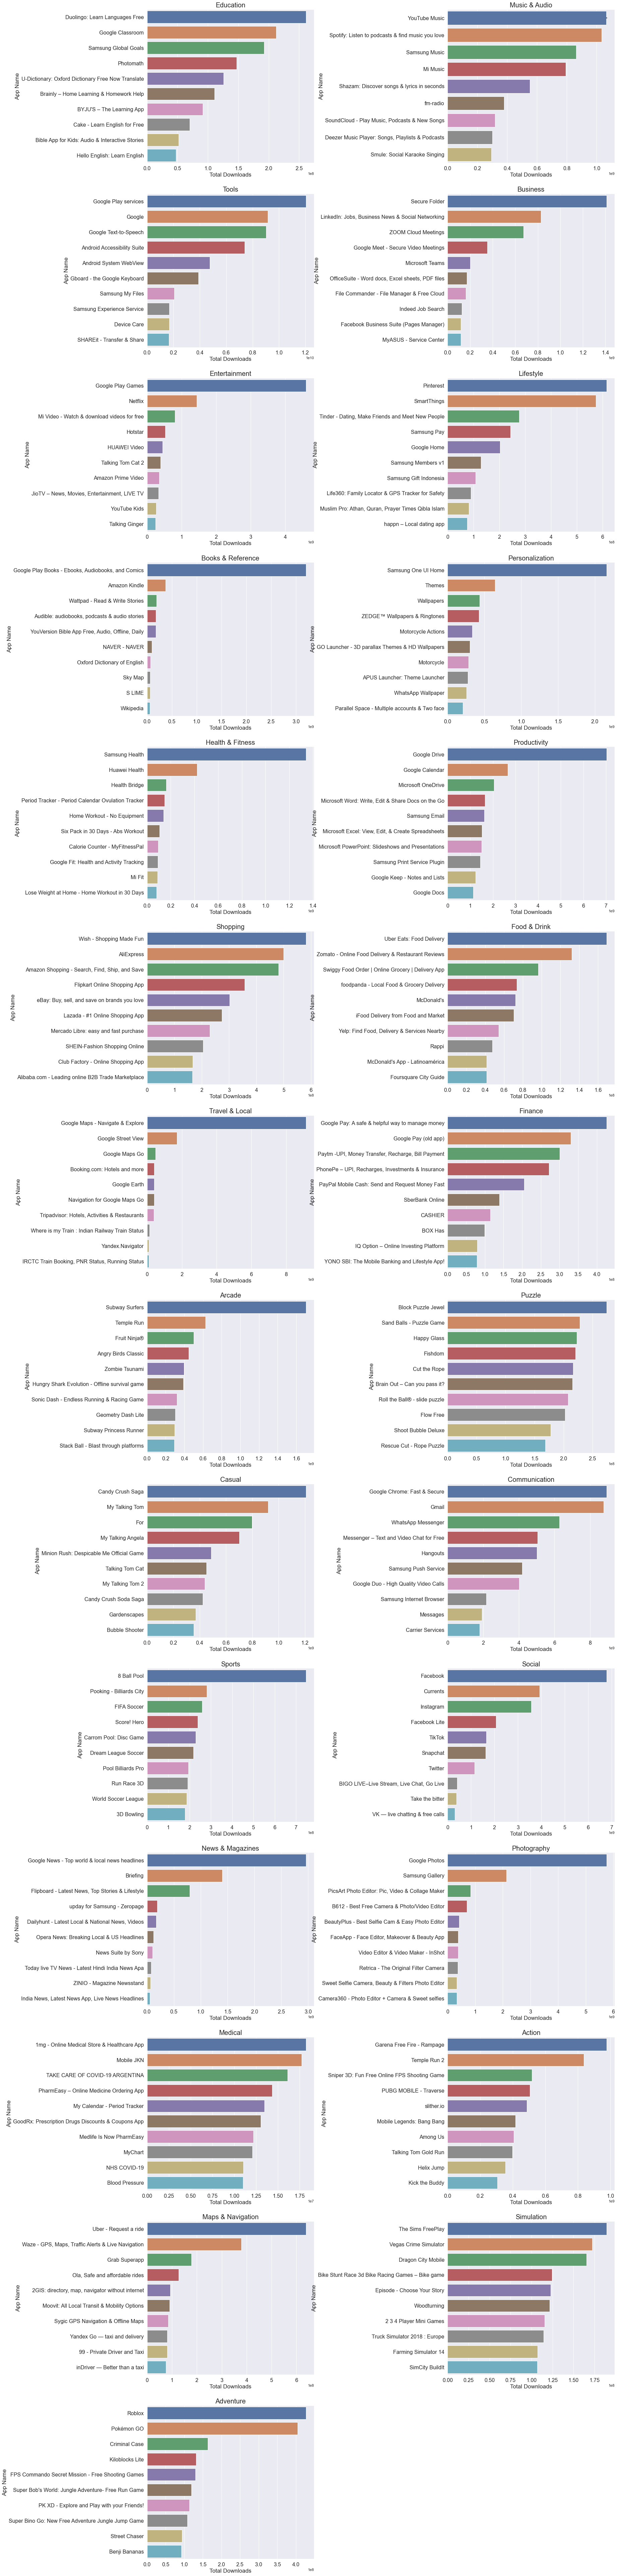

In [66]:
num=1
plt.tight_layout()
plt.figure(figsize=(25,140))

for category in category_list:
    plt.subplot(14,2,num)
    sns.barplot(y=[(trans.translate(name,dest='en').text) for name in (df[df['Category']==category].nlargest(10,'Maximum Installs')['App Name'])],
                x=df[df['Category']==category].nlargest(10,'Maximum Installs')['Maximum Installs'])
    plt.title(category,size=20)
    plt.yticks(size=16)
    plt.xticks(size=16)
    plt.xlabel(xlabel='Total Downloads',size=17)
    plt.ylabel(ylabel='App Name',size=17)
    plt.subplots_adjust(wspace=0.8)
    num+=1 

##### 2) Total Ratings given 

<Figure size 432x288 with 0 Axes>

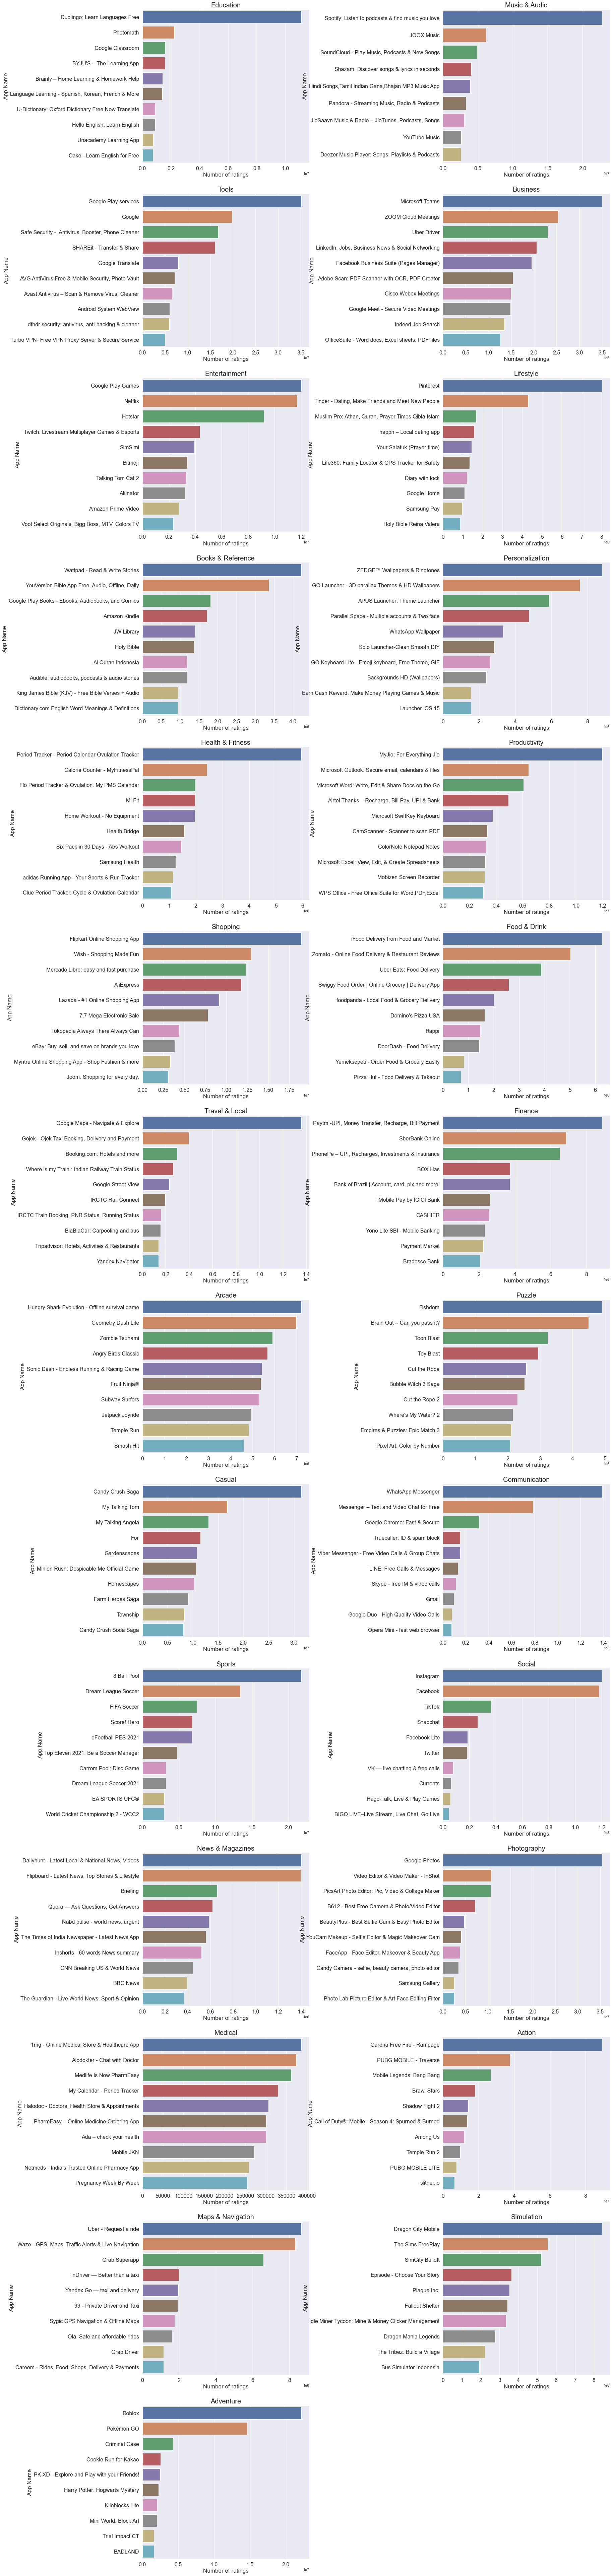

In [67]:
num=1
plt.tight_layout()
plt.figure(figsize=(25,140))

for category in category_list:
    plt.subplot(14,2,num)
    sns.barplot(y=[(trans.translate(name,dest='en').text) for name in (df[df['Category']==category].nlargest(10,'Rating Count')['App Name'])],
                x=df[df['Category']==category].nlargest(10,'Rating Count')['Rating Count'])
    plt.title(category,size=20)
    plt.yticks(size=16)
    plt.xticks(size=16)
    plt.xlabel(xlabel='Number of ratings',size=17)
    plt.ylabel(ylabel='App Name',size=17)
    plt.subplots_adjust(wspace=0.8)
    num+=1 

##### 3) Free Vs Paid Apps 

<Figure size 432x288 with 0 Axes>

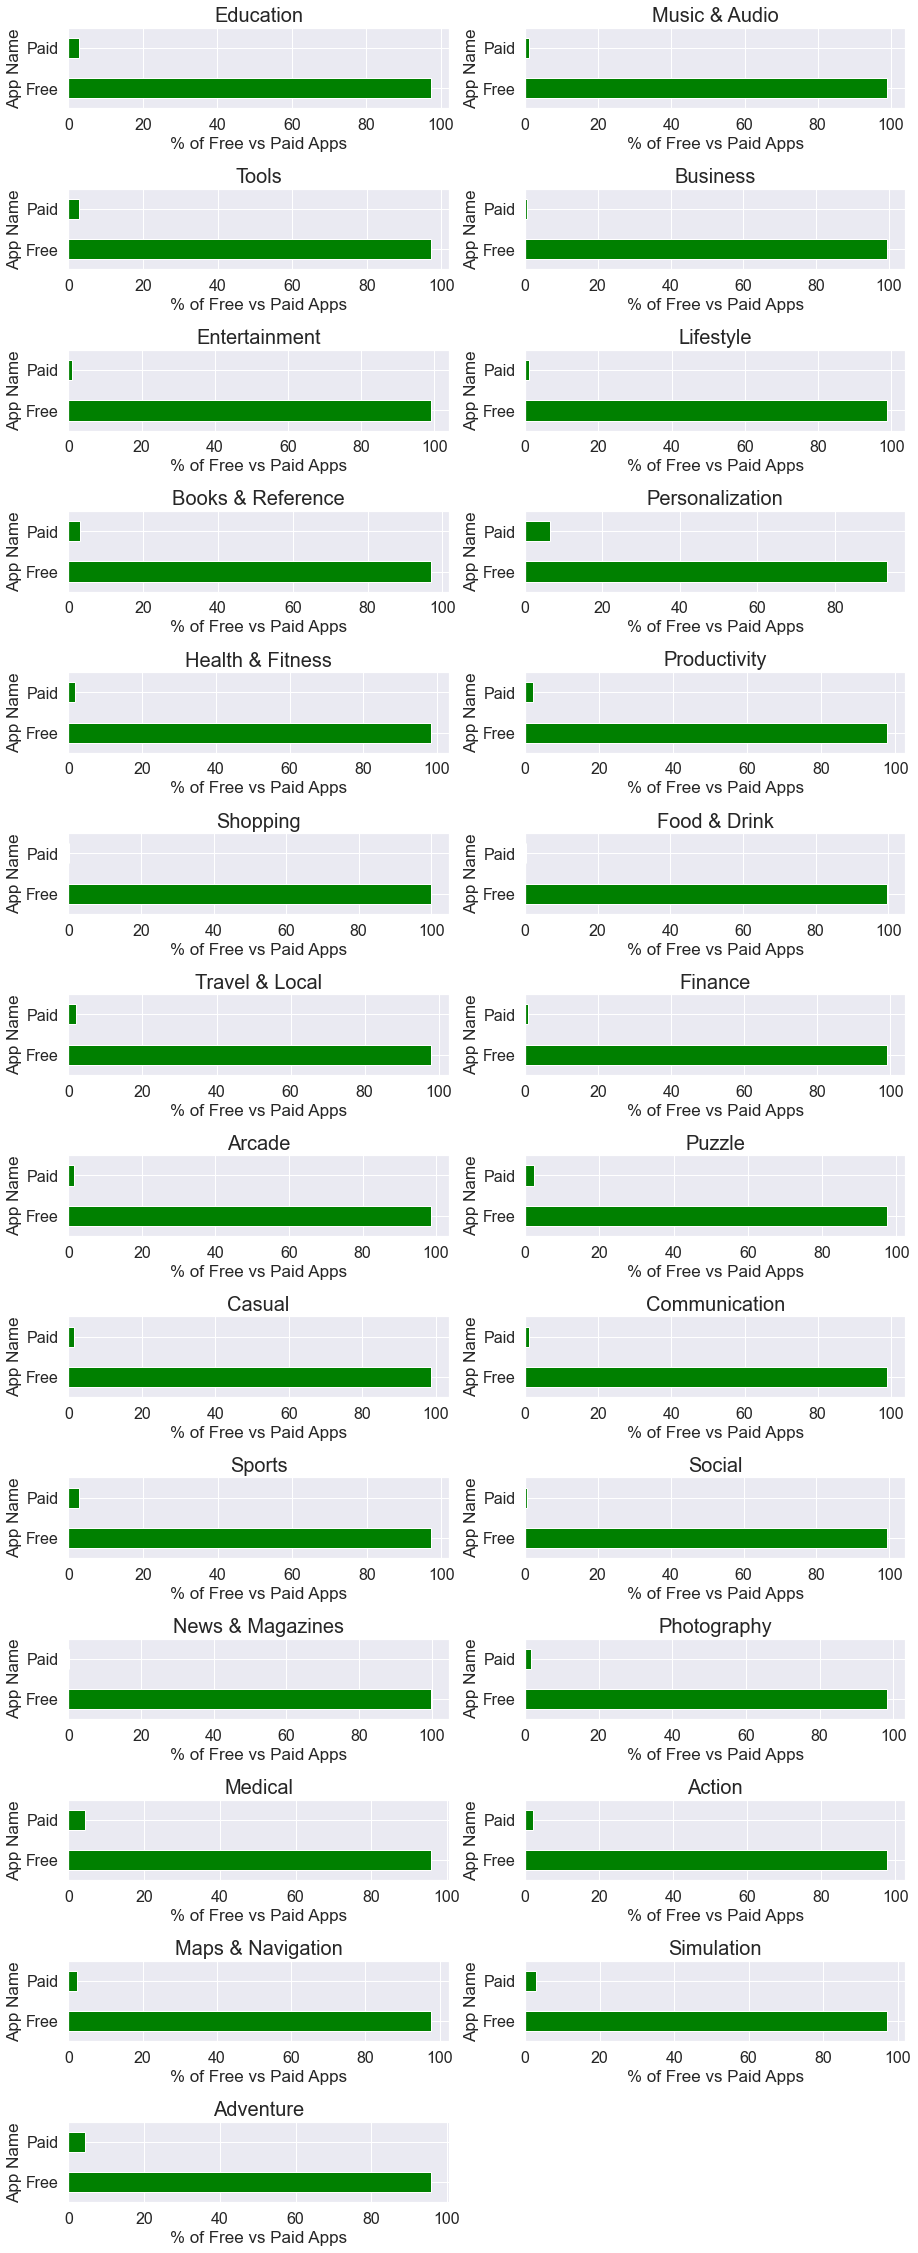

In [68]:
num=1
plt.tight_layout()
plt.figure(figsize=(15,40))

for category in category_list:
    plt.subplot(14,2,num)
    (df[df['Category']==category]['Free'].value_counts()/len(df[df['Category']==category])*100).plot(kind='barh',color='Green')
    plt.title(category,size=20)
    plt.yticks(size=16)
    plt.xticks(size=16)
    plt.xlabel(xlabel='% of Free vs Paid Apps',size=17)
    plt.ylabel(ylabel='App Name',size=17)
    plt.subplots_adjust(hspace=1)
    num+=1 

##### 4) Top Apps with Size

In [69]:
num=1
plt.tight_layout()
plt.figure(figsize=(25,400))

for category in category_list:
    plt.subplot(27,1,num)
    sns.barplot(y=[(trans.translate(name,dest='en').text) for name in (df[df['Category']==category].nlargest(10,'Size_MB')['App Name'])],
                x=df[df['Category']==category].nlargest(10,'Size_MB')['Size_MB'])
    plt.title(category,size=30)
    plt.yticks(size=23)
    plt.xticks(size=23)
    plt.xlabel(xlabel='Size (MB)',size=25)
    plt.ylabel(ylabel='App Name',size=25)
    plt.subplots_adjust(hspace=.3)
    num+=1 

<Figure size 432x288 with 0 Axes>

C:\Users\vinay\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 2980 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\vinay\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 3008 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\vinay\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 2986 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\vinay\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 3021 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\vinay\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 2975 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\vinay\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 128274 missing from curre

#####  5) Ad Supported Apps

<Figure size 432x288 with 0 Axes>

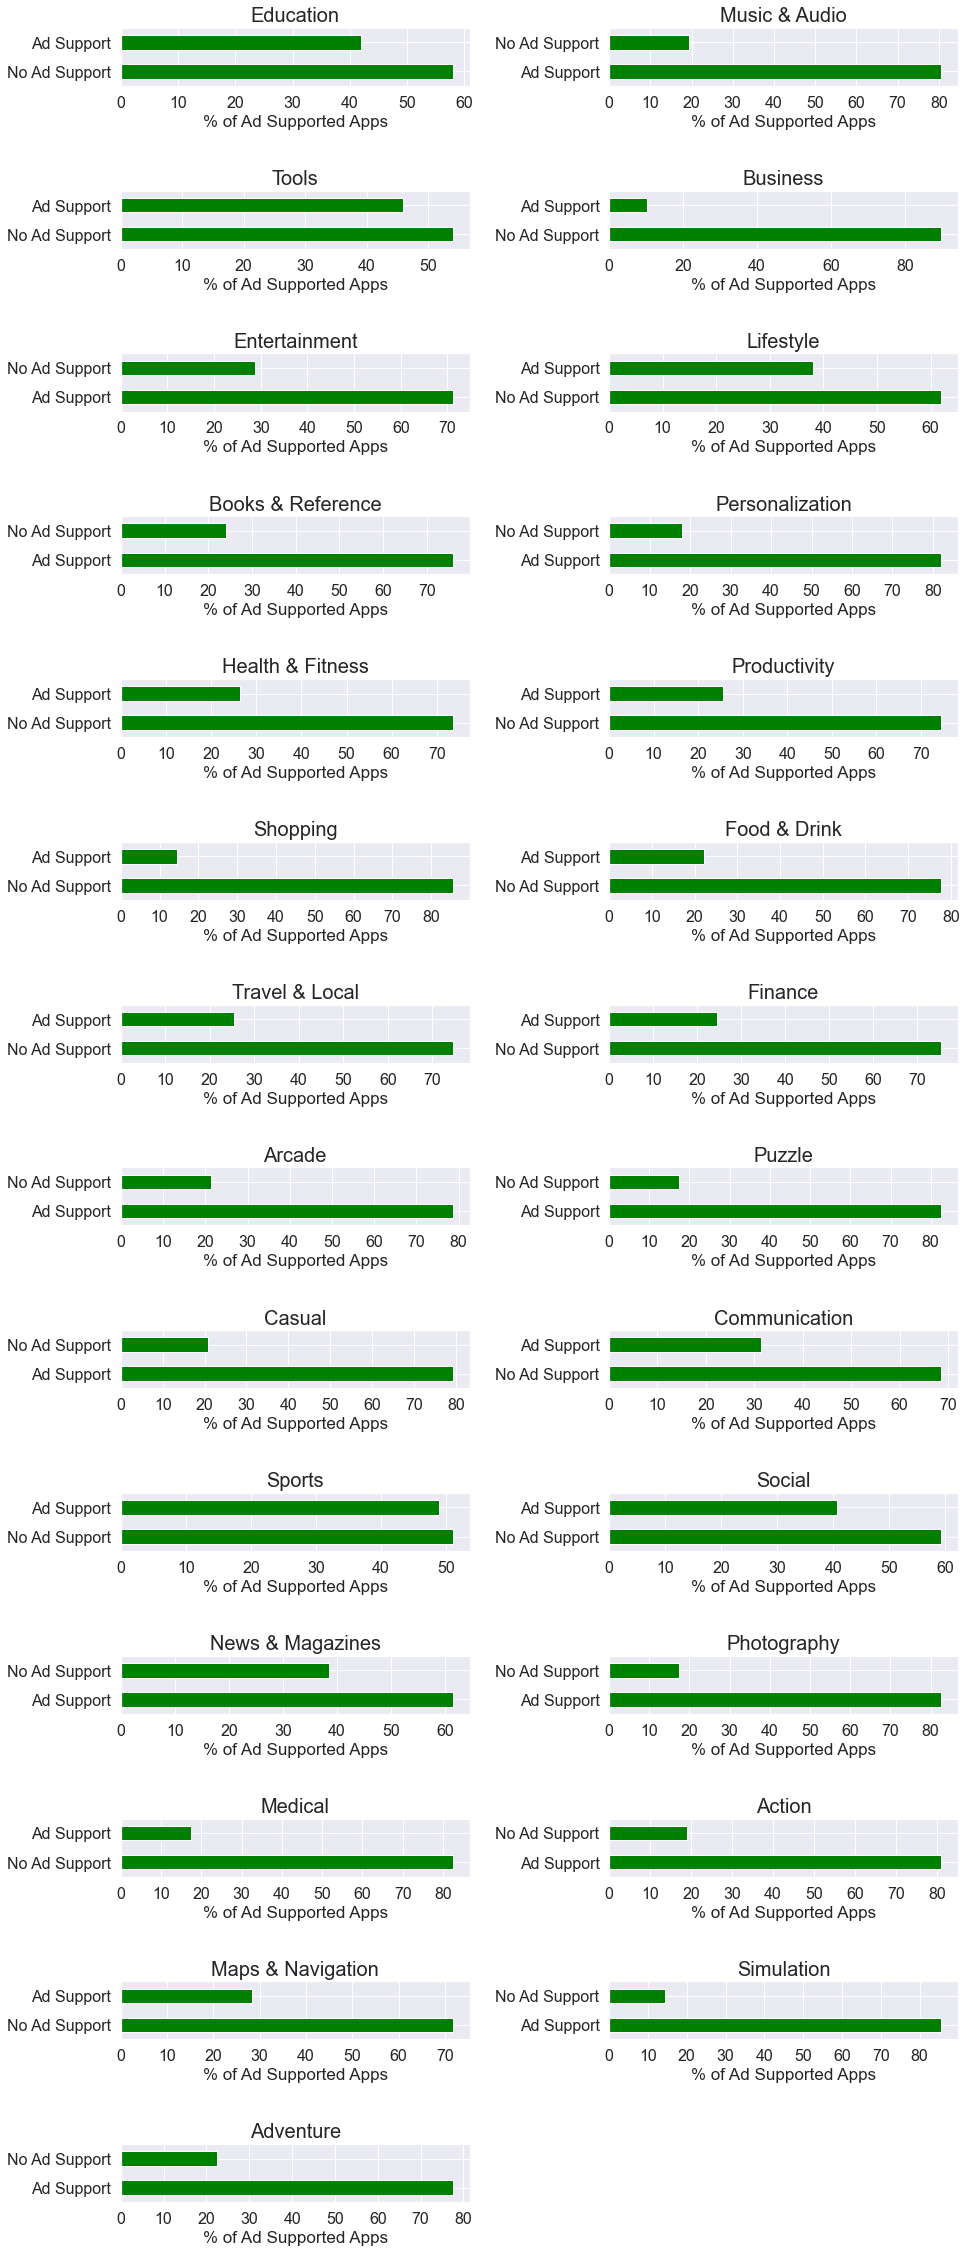

In [70]:
num=1
plt.tight_layout()
plt.figure(figsize=(15,40))

for category in category_list:
    plt.subplot(14,2,num)
    (df[df['Category']==category]['Ad Supported'].value_counts()/len(df[df['Category']==category])*100).plot(kind='barh',color='Green')
    plt.title(category,size=20)
    plt.yticks(size=16)
    plt.xticks(size=16)
    plt.xlabel(xlabel='% of Ad Supported Apps',size=17) 
    plt.subplots_adjust(hspace=1.8)
    plt.subplots_adjust(wspace=0.4)
    num+=1 

####  6) Apps with In-App Purchase 

<Figure size 432x288 with 0 Axes>

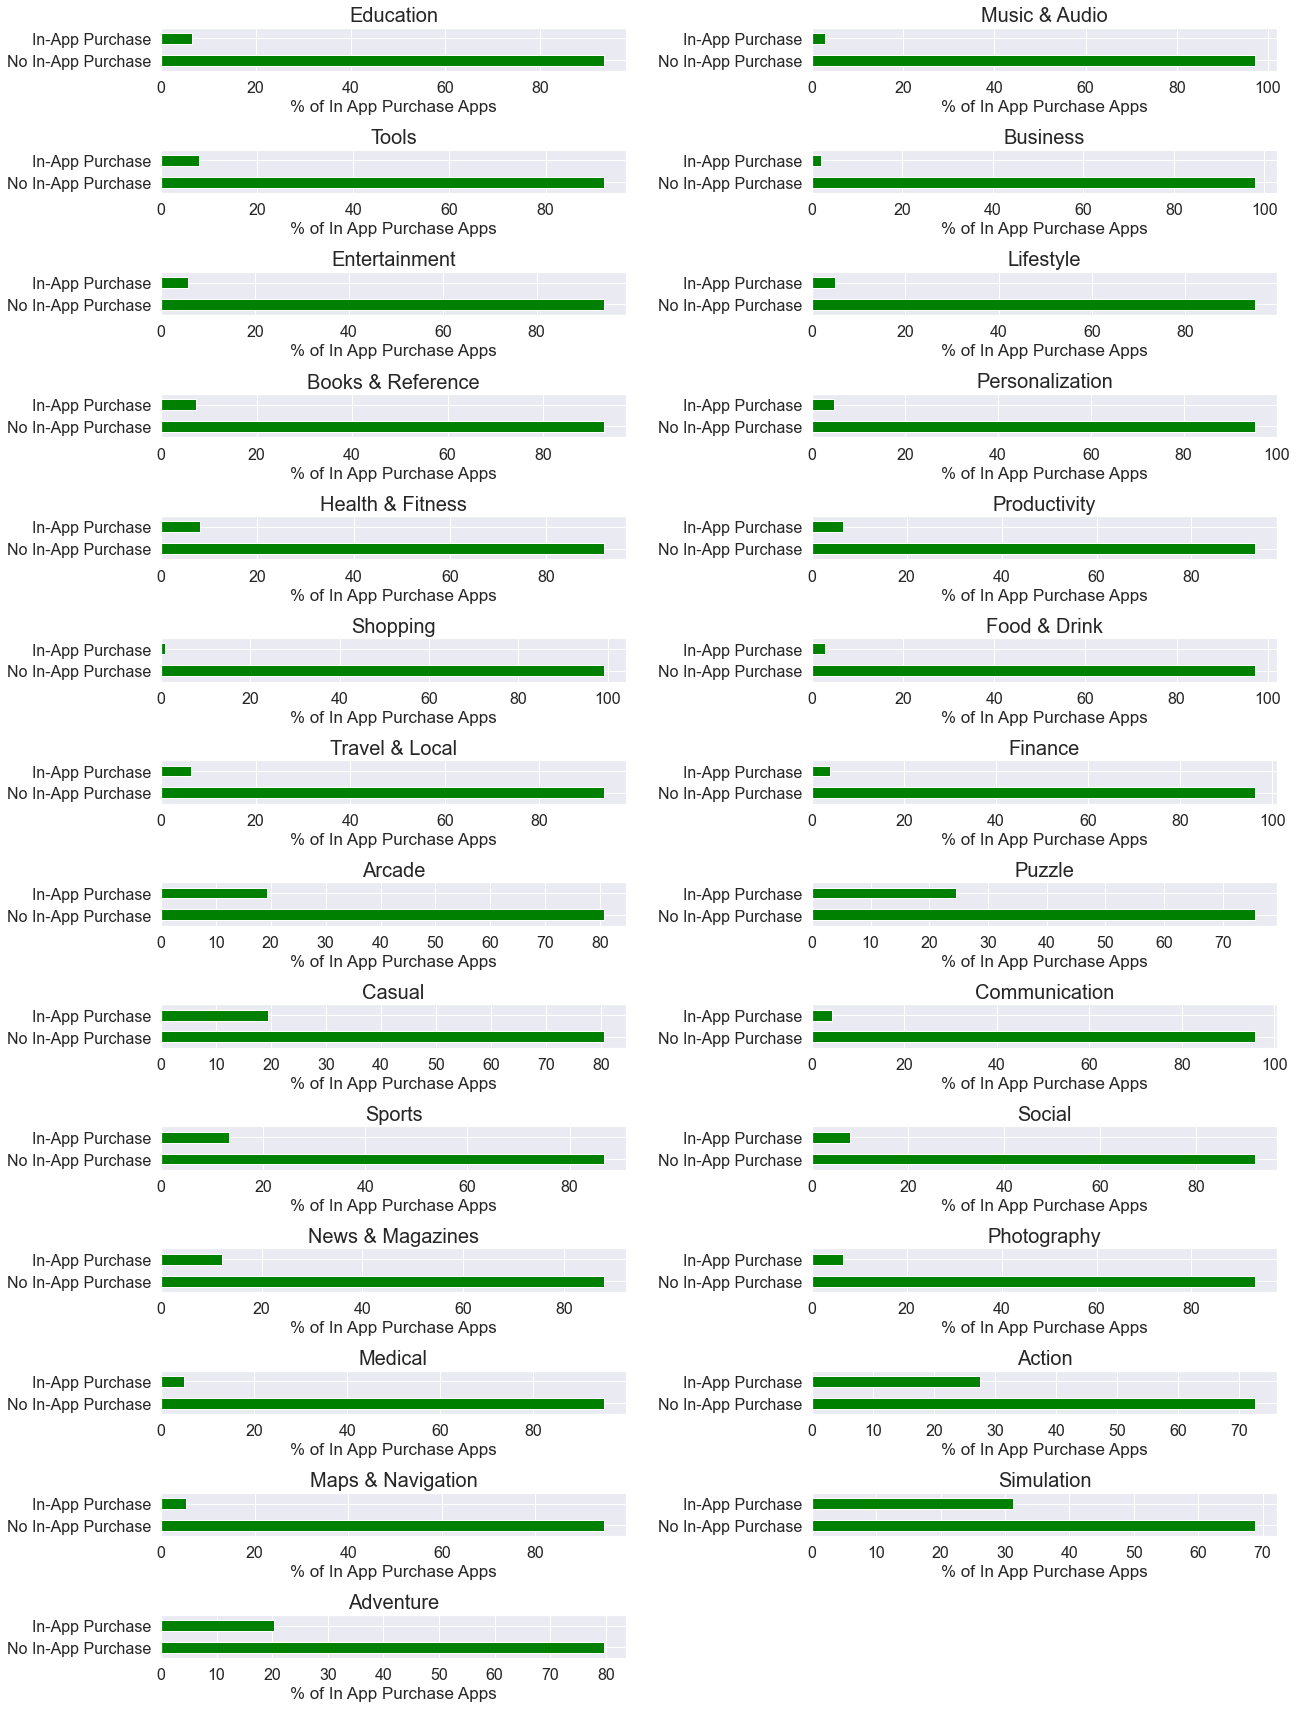

In [71]:
num=1
plt.tight_layout()
plt.figure(figsize=(20,30))

for category in category_list:
    plt.subplot(14,2,num)
    ((df[df['Category']==category]['In App Purchases']).value_counts()/(len(df[df['Category']==category]))*100).plot(kind='barh',color='Green')
    plt.title(category,size=20)
    plt.yticks(size=16)
    plt.xticks(size=16)
    plt.xlabel(xlabel='% of In App Purchase Apps',size=17)
    plt.subplots_adjust(wspace=.4)
    plt.subplots_adjust(hspace=1.8)
    num+=1 

#### 7) Apps Recommended for.....

<AxesSubplot:>

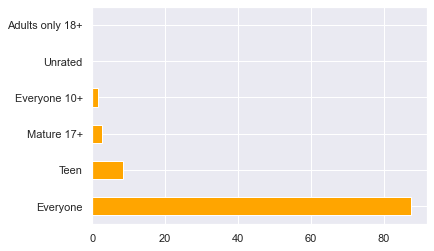

In [72]:
(df['Content Rating'].value_counts()/len(df)*100).plot(kind='barh',color='Orange')

##### 8)  Currency 

In [73]:
df['Currency'].value_counts() 

USD    2311546
XXX       1236
EUR          6
INR          5
GBP          3
CAD          2
VND          1
BRL          1
KRW          1
TRY          1
RUB          1
SGD          1
AUD          1
PKR          1
ZAR          1
Name: Currency, dtype: int64

##### Maximum Paid or In-App Purchase apps accepts money in USD 

In [74]:
df.to_csv('Google_Play_Store.csv') # Saving dataset for Data Visualization